<a href="https://colab.research.google.com/github/DrevnytskaYuliia/Data-Management-trying-to-become-someone-fr-/blob/main/B_PROJECT_DATA_MANAGEMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Motivation and Introduction**

The retail industry has changed due to the development of eCommerce platforms, which have left behind extensive digital records of customer behaviour. Every click, view, and purchase generates useful data that businesses can use to get better understanding of their clients, enhance user experience, and boost sales. However, there are analytical and technical difficulties in analysing such large amounts of behavioural data.

The user interaction data used in this project was gathered over a seven-month period from a large multi-category online store, recording over 285 million events such as product views, cart additions, and purchases. Our goal is to extract insights from this behavioural data so that we can make better decisions in areas like revenue forecasting, personalised marketing, and customer segmentation.

We use a mix of classification, regression, and clustering methods to investigate the possibilities of the data. These techniques allow us to predict the likelihood of transformation, identify different types of customers, and estimate future customer value.

**Dataset description**

The dataset used in this project is titled **“eCommerce behavior data from multi category store”**, publicly available on Kaggle.
It was collected as part of the Open CDP (Customer Data Platform) project.

It consists of approximately 67.5 million rows and captures user behavior events over a 7-month period (October 2019 to April 2020). Each row represents an interaction between a user and a product on a multi-category eCommerce platform.

**Total values:** 67501979

Main features of each variable in the dataset:


*   **event_time:** Records the exact timestamp of the user interaction with the platform (in UTC format).
*   **event_type:** Indicates the type of user action. Possible values include:

**view** – the user viewed a product

**cart** – the user added a product to cart

**remove_from_cart** – the user removed a product from cart

**purchase** – the user completed a purchase

*   **product_id:** A unique identifier for the product.
*   **category_id:** Numeric ID representing the product category.
*   **category_code:** Hierarchical string that describes the product category (e.g., electronics.smartphone, appliances.kitchen.)
*   **brand:** Name of the product brand.
*   **price:** Price of the product at the time of the interaction.
*   **user_id:** Unique anonymous identifier for the user.
*   **user_session:** Session ID used to group actions by browsing sessions.

**Research questions tackled**

**1. Clustering**

How can we group users based on their shopping behavior (e.g., frequency of views, cart additions, and purchases), and what distinct customer personas emerge from these clusters?

1.1 Can we identify distinct shopper personas (ex. window shoppers, cart abandoners, impulse buyers etc.)

1.2 How do these personas differ by product category preferences or average price points?

1.3 Are there differences in when and how often these groups shop?

1.4 Do patterns like repeat visits, short vs. long sessions, or quick purchase decisions help distinguish these clusters?

**2. Regression**

Can we predict the total revenue generated by a user based on their product browsing and cart behavior?

2.1  How does the number of product views and cart additions relate to the purchase amount?

2.2 Does the average price of viewed or carted products influence the final amount spent?

2.3 Do users who interact with multiple product categories tend to spend more?

2.4 Does recency or frequency of interaction affect total spending?

**3. Classification**

Can we classify whether a user will make a purchase within the next 7 days based on their recent browsing behavior?

3.1  Which behavioral signals are most predictive of an upcoming purchase?

3.2  Does cart behavior (e.g., added but not purchased) increase the likelihood of a purchase soon?

3.3 How well can we predict the likelihood of a purchase in the next 7 days?

3.4 Can we detect patterns in user behavior that help us intervene earlier?

**References**
**TO FIND**

**Import**

In [1]:
!pip install kagglehub

In [2]:
!pip install PCA

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.4/190.4 kB 7.7 MB/s eta 0:00:00


In [3]:
!pip install KMeans

  Preparing metadata (setup.py) ... done
  Created wheel for KMeans: filename=kmeans-1.0.2-cp311-cp311-linux_x86_64.whl size=12527 sha256=e163908ef4a17341bb27b9420f7071f7595a2b8429e0ba42cc1b2c9a8a241232
  Stored in directory: /root/.cache/pip/wheels/46/73/c1/99a115afb9caa9d3fa04a35509d96d075f18944cbf2b7bdf9b
Successfully built KMeans


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder

# **STEP 1: Load Data**


In [5]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# 2. Set the path to a specific CSV file from the dataset
file_path = "2019-Oct.csv"

# 3. Load into a DataFrame
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "mkechinov/ecommerce-behavior-data-from-multi-category-store",
    file_path
)

# 4. Preview
print("First 5 records:", df.head())

/tmp/ipython-input-5-1741159564.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:                 event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00 UTC       view    44600062  2103807459595387724   
1  2019-10-01 00:00:00 UTC       view     3900821  2053013552326770905   
2  2019-10-01 00:00:01 UTC       view    17200506  2053013559792632471   
3  2019-10-01 00:00:01 UTC       view     1307067  2053013558920217191   
4  2019-10-01 00:00:04 UTC       view     1004237  2053013555631882655   

                         category_code     brand    price    user_id  \
0                                  NaN  shiseido    35.79  541312140   
1  appliances.environment.water_heater      aqua    33.20  554748717   
2           furniture.living_room.sofa       NaN   543.10  519107250   
3                   computers.notebook    lenovo   251.74  550050854   
4               electronics.smartphone     apple  1081.98  535871217   

                           user_session  
0  72d76fde-8bb3-4e00-8c23-a032dfed738c  
1  9333dfbd-b87a-4708

In [6]:
#we have decided to go with sample of the data, understanding our large dataset limitations and also I added the index restart

df_sampled = (df.groupby('event_type', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42)).reset_index(drop=True))

/tmp/ipython-input-6-3137137173.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = (df.groupby('event_type', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42)).reset_index(drop=True))


In [7]:
print(df_sampled.head())

                event_time event_type  product_id          category_id  \
0  2019-10-04 09:55:58 UTC       cart     1004741  2053013555631882655   
1  2019-10-26 11:17:32 UTC       cart     5100562  2053013553341792533   
2  2019-10-29 09:14:58 UTC       cart     1004863  2053013555631882655   
3  2019-10-24 05:00:37 UTC       cart     1005100  2053013555631882655   
4  2019-10-17 08:46:22 UTC       cart     1004858  2053013555631882655   

            category_code    brand   price    user_id  \
0  electronics.smartphone   xiaomi  185.67  512856885   
1      electronics.clocks    apple  301.36  513130812   
2  electronics.smartphone  samsung  170.15  565340594   
3  electronics.smartphone  samsung  141.32  512750861   
4  electronics.smartphone  samsung  131.62  561136578   

                           user_session  
0  85a2394c-be15-4bc3-9027-0d486762e470  
1  5dbde477-b293-4ab0-aeea-d721791aa0bf  
2  5b9591ab-2f6d-4aaf-bbe1-85de83ac641f  
3  9f5ca722-82d8-46dd-8f45-24316aff2c82  
4 

In [8]:
#lets look if sampling is sucessfull. It is, we have got 10 percent, that follows the shape of original data

print("Original shape:", df.shape)
print("Sampled shape:", df_sampled.shape)

print("Original nulls:\n", df.isnull().sum())
print("Sampled nulls:\n", df_sampled.isnull().sum())

Original shape: (42448764, 9)
Sampled shape: (4244877, 9)
Original nulls:
 event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64
Sampled nulls:
 event_time             0
event_type             0
product_id             0
category_id            0
category_code    1351338
brand             611047
price                  0
user_id                0
user_session           0
dtype: int64


# STEP 2: Prepare and investigate data

In [9]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4244877 entries, 0 to 4244876
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 291.5+ MB


In [10]:
# then we need to change event_time to processable format

df_sampled['event_time'] = pd.to_datetime(df_sampled['event_time'], errors='coerce')

In [11]:
#looking at data - sad sad
df_sampled.isnull().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,1351338
brand,611047
price,0
user_id,0
user_session,0


In [12]:
# As we have a lot of missing vakues for category_code and brand, we have decided to fill them

df_sampled['brand'] = df_sampled['brand'].fillna('unknown')
df_sampled['category_code'] = df_sampled['category_code'].fillna('unknown')

In [13]:
#sucessfully filled

df_sampled.isnull().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,0
brand,0
price,0
user_id,0
user_session,0


In [14]:
#looking for the duplicates

df_sampled.duplicated().sum()

np.int64(576)

In [15]:
#it showed us exact duplicates, so it would be safe to delete those

df_sampled = df_sampled.drop_duplicates()

In [16]:
#Also lets look at the prices and see if there is something unreasinable, so 0 or with minus sign

bad_prices = df_sampled[df_sampled['price'] <= 0]
print("Rows with price <= 0:", len(bad_prices))

bad_prices.head()

Rows with price <= 0: 6794


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
21568,2019-10-14 19:40:32+00:00,cart,1005228,2053013555631882655,electronics.smartphone,unknown,0.0,513430572,8564e0e9-c244-4ae6-8193-420ef8655cbb
29875,2019-10-25 13:06:42+00:00,cart,60500001,2162513070503494350,construction.tools.welding,unknown,0.0,531271515,e17766e0-5173-4281-8174-456323345b4d
34272,2019-10-15 08:19:57+00:00,cart,12720530,2053013553559896355,unknown,unknown,0.0,516625150,c0653e09-9d3c-4d0f-96bc-f760e20cbef5
39119,2019-10-14 16:26:49+00:00,cart,3601612,2053013563810775923,appliances.kitchen.washer,unknown,0.0,560190485,0b6ddb64-7548-4037-b752-fe1abcb0c2c1
50693,2019-10-14 08:07:41+00:00,cart,1005229,2053013555631882655,electronics.smartphone,unknown,0.0,515917265,dbccfe2b-0360-44c4-8a52-fcaadb737b70


In [17]:
#so we are dropping price that is 0 or smaller, but inly for cart and purchase. because view can help us with behavioural analysis still and does no harm for predicting revenue or values

df_sampled = df_sampled[~((df_sampled['price'] <= 0) & (df_sampled['event_type'].isin(['cart', 'purchase'])))]


In [18]:
#also checked if there are unrealistically big prices

df_sampled.sort_values(by='price', ascending=False).head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
662788,2019-10-05 16:40:27+00:00,view,21407287,2053013561579406073,electronics.clocks,rado,2574.07,523179348,d4afee47-b364-44de-88ad-32de42485900
2109937,2019-10-31 10:17:00+00:00,view,21408160,2053013561579406073,electronics.clocks,unknown,2574.07,514006658,b52ab33a-2117-49cb-a851-63d6acd342b8
253119,2019-10-29 12:33:54+00:00,view,21408165,2053013561579406073,electronics.clocks,unknown,2574.07,555961298,1ebd35ef-97ae-4251-89c7-a058389819b5
3659520,2019-10-17 11:03:24+00:00,view,21407288,2053013561579406073,electronics.clocks,rado,2574.07,546955465,e970ea8f-38ac-48f3-a1ff-312b9d5557cd
873604,2019-10-22 01:48:15+00:00,view,21407288,2053013561579406073,electronics.clocks,rado,2574.07,545195018,5d13bc8d-3954-42da-80d4-90c96760b492


In [19]:
#also we need to see if some of the users are suspicious, so looked at the

df_sampled['user_id'].value_counts().head(20)

,count
user_id,
512475445,718
512365995,379
512505687,281
526731152,275
513021392,264
546159478,244
514649263,242
546270188,236
537873067,234


In [20]:
#looked for suspicious activity, but bro  is probably a window shoppper
top_user = df_sampled[df_sampled['user_id'] == 512475445]
top_user['event_type'].value_counts()

,count
event_type,
view,718


# Data preparation (User DF)

features Extract additional features чи це будні дні чи вихідні
Можна зробити лейбли


In [21]:
#adding tags to see how many times each user vieweed, put something into cart or purchased by adding aditional columns

df_sampled['view'] = (df_sampled['event_type'] == 'view').astype(int)
df_sampled['cart'] = (df_sampled['event_type'] == 'cart').astype(int)
df_sampled['purchase'] = (df_sampled['event_type'] == 'purchase').astype(int)

In [22]:
#doing separate columns for hours

df_sampled['hour_of_day'] = df_sampled['event_time'].dt.hour
df_sampled['weekday_name'] = df_sampled['event_time'].dt.day_name()

# Tag weekends using the weekday name
df_sampled['is_weekend'] = df_sampled['weekday_name'].isin(['Saturday', 'Sunday'])

In [23]:
df_sampled.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,view,cart,purchase,hour_of_day,weekday_name,is_weekend
0,2019-10-04 09:55:58+00:00,cart,1004741,2053013555631882655,electronics.smartphone,xiaomi,185.67,512856885,85a2394c-be15-4bc3-9027-0d486762e470,0,1,0,9,Friday,False
1,2019-10-26 11:17:32+00:00,cart,5100562,2053013553341792533,electronics.clocks,apple,301.36,513130812,5dbde477-b293-4ab0-aeea-d721791aa0bf,0,1,0,11,Saturday,True
2,2019-10-29 09:14:58+00:00,cart,1004863,2053013555631882655,electronics.smartphone,samsung,170.15,565340594,5b9591ab-2f6d-4aaf-bbe1-85de83ac641f,0,1,0,9,Tuesday,False
3,2019-10-24 05:00:37+00:00,cart,1005100,2053013555631882655,electronics.smartphone,samsung,141.32,512750861,9f5ca722-82d8-46dd-8f45-24316aff2c82,0,1,0,5,Thursday,False
4,2019-10-17 08:46:22+00:00,cart,1004858,2053013555631882655,electronics.smartphone,samsung,131.62,561136578,d0ebb3eb-6323-4138-b812-38567d4a36c7,0,1,0,8,Thursday,False


In [25]:
#then decided to concentrate on users and do a new df to define their actions grouping by user id. Also aggregate basic statistics per user

views = df_sampled[df_sampled['view'] == 1]
carts = df_sampled[df_sampled['cart'] == 1]
purchases = df_sampled[df_sampled['purchase'] == 1] #price-based stats filering

avg_price_viewed = views.groupby('user_id')['price'].mean().reset_index(name='avg_price_viewed') #separation by groups
avg_price_carted = carts.groupby('user_id')['price'].mean().reset_index(name='avg_price_carted')
total_spent = purchases.groupby('user_id')['price'].sum().reset_index(name='total_spent')

user_df = df_sampled.groupby('user_id').agg(
    total_views=('view', 'sum'),
    total_cart_additions=('cart', 'sum'),
    total_purchases=('purchase', 'sum'),
    num_categories=('category_code', pd.Series.nunique),
    num_products_viewed=('product_id', pd.Series.nunique),
    first_action=('event_time', 'min'),
    last_action=('event_time', 'max'),
    num_events=('event_time', 'count')
).reset_index() # Calculate base user metrics

# Merge it all
user_df = user_df.merge(avg_price_viewed, on='user_id', how='left')
user_df = user_df.merge(avg_price_carted, on='user_id', how='left')
user_df = user_df.merge(total_spent, on='user_id', how='left')


In [26]:
#also fill avg_price_carted and total_spent with 0

user_df['avg_price_carted'] = user_df['avg_price_carted'].fillna(0)
user_df['total_spent'] = user_df['total_spent'].fillna(0)

In [27]:
user_df['activity_days'] = (user_df['last_action'] - user_df['first_action']).dt.days + 1 #number of active days (added 0, to add the day of a start)

user_df['event_frequency'] = user_df['num_events'] / user_df['activity_days'] #event frequency (number per day)

user_df['cart_to_view_ratio'] = user_df['total_cart_additions'] / (user_df['total_views'] + 1e-5)

user_df['purchase_to_cart_ratio'] = user_df['total_purchases'] / (user_df['total_cart_additions'] + 1e-5)

user_df['purchase_to_view_ratio'] = user_df['total_purchases'] / (user_df['total_views'] + 1e-5)

user_df['cart_to_purchase_ratio'] = user_df['total_cart_additions'] / (user_df['total_purchases'] + 1e-5)


user_df['cart_to_purchase_ratio'] = user_df['cart_to_purchase_ratio'].fillna(0)
user_df['cart_to_view_ratio'] = user_df['cart_to_view_ratio'].fillna(0)
user_df['purchase_to_view_ratio'] = user_df['purchase_to_view_ratio'].fillna(0)
user_df['purchase_to_cart_ratio'] = user_df['purchase_to_cart_ratio'].fillna(0)
user_df['avg_price_viewed'] = user_df['avg_price_viewed'].fillna(0)

In [28]:
# % of events on weekends
weekend_activity_ratio = (
    df_sampled
    .groupby('user_id')['is_weekend']
    .mean()
    .reset_index(name='weekend_activity_ratio'))

# Most active hour of the day (mode)
active_hour = (
    df_sampled
    .groupby('user_id')['hour_of_day']
    .agg(lambda x: x.mode().iloc[0])  # safe mode extraction
    .reset_index(name='most_active_hour') )

In [29]:
user_df = user_df.merge(weekend_activity_ratio, on='user_id', how='left')
user_df = user_df.merge(active_hour, on='user_id', how='left') #merged them in user-df

In [50]:
#time features for clustering

# Add a session_date to split sessions by day
df_sampled['session_date'] = df_sampled['event_time'].dt.date

# Group by user and date to get daily sessions
sessions = df_sampled.groupby(['user_id', 'session_date']).agg(
    session_start=('event_time', 'min'),
    session_end=('event_time', 'max')
).reset_index()

# Calculate session duration in minutes (per day)
sessions['session_duration_minutes'] = (
    (sessions['session_end'] - sessions['session_start']).dt.total_seconds() / 60
)

# Now get the *average daily session duration* for each user
avg_session_duration = sessions.groupby('user_id')['session_duration_minutes'].mean().reset_index()

# Merge back to user_df
user_df = user_df.merge(avg_session_duration, on='user_id', how='left')

In [48]:
user_df['recency_days'] = (user_df['last_action'] - user_df['first_action']).dt.days
today = pd.to_datetime("2025-06-27")

user_df['last_action_naive'] = user_df['last_action'].dt.tz_localize(None)

today = pd.to_datetime("2025-06-27")  # naive, no tz
user_df['days_since_last_action'] = (today - user_df['last_action_naive']).dt.days

user_df['price_diff_cart_vs_view'] = user_df['avg_price_carted'] - user_df['avg_price_viewed']
user_df['purchase_ratio'] = user_df['total_purchases'] / user_df['num_events']

-- these are features for the classification

In [31]:
print(user_df.columns)

Index(['user_id', 'total_views', 'total_cart_additions', 'total_purchases',
       'num_categories', 'num_products_viewed', 'first_action', 'last_action',
       'num_events', 'avg_price_viewed', 'avg_price_carted', 'total_spent',
       'activity_days', 'event_frequency', 'cart_to_view_ratio',
       'purchase_to_cart_ratio', 'purchase_to_view_ratio',
       'cart_to_purchase_ratio', 'weekend_activity_ratio', 'most_active_hour',
       'recency_days', 'session_duration_minutes', 'last_action_naive',
       'days_since_last_action', 'price_diff_cart_vs_view', 'purchase_ratio'],
      dtype='object')


In [32]:
#Also wanna sort it to improve readability

user_df = user_df[[
    'user_id',

    # Activity
    'total_views', 'total_cart_additions', 'total_purchases',
    'num_events', 'activity_days', 'most_active_hour', 'event_frequency', 'weekend_activity_ratio',

    # Behavior
    'cart_to_view_ratio', 'cart_to_purchase_ratio', 'purchase_to_view_ratio', 'purchase_to_cart_ratio',

    # Monetary
    'avg_price_viewed', 'avg_price_carted', 'total_spent', 'price_diff_cart_vs_view',

    # Diversity
    'num_categories', 'num_products_viewed',

    # Timestamps
    'first_action', 'last_action', 'recency_days', 'session_duration_minutes', 'days_since_last_action', 'session_duration',

    # Ratio
    'purchase_ratio'
]]


In [33]:
user_df.head()

,user_id,total_views,total_cart_additions,total_purchases,num_events,activity_days,most_active_hour,event_frequency,weekend_activity_ratio,cart_to_view_ratio,...,total_spent,price_diff_cart_vs_view,num_categories,num_products_viewed,first_action,last_action,recency_days,session_duration_minutes,days_since_last_action,purchase_ratio
0,33869381,1,0,0,1,1,20,1.0,0.0,0.0,...,0.0,-769.650000,1,1,2019-10-23 20:04:08+00:00,2019-10-23 20:04:08+00:00,0,0.000000,2073,0.0
1,184265397,1,0,0,1,1,17,1.0,0.0,0.0,...,0.0,-143.890000,1,1,2019-10-04 17:44:37+00:00,2019-10-04 17:44:37+00:00,0,0.000000,2092,0.0
2,200673532,1,0,0,1,1,14,1.0,1.0,0.0,...,0.0,-73.360000,1,1,2019-10-13 14:26:21+00:00,2019-10-13 14:26:21+00:00,0,0.000000,2083,0.0
3,208669541,1,0,0,1,1,5,1.0,0.0,0.0,...,0.0,-8.750000,1,1,2019-10-04 05:49:46+00:00,2019-10-04 05:49:46+00:00,0,0.000000,2092,0.0
4,209714031,3,0,0,3,6,19,0.5,0.0,0.0,...,0.0,-599.663333,2,3,2019-10-24 18:18:25+00:00,2019-10-29 19:49:54+00:00,5,7291.483333,2067,0.0


In [34]:
#looking if I have broken stuff - apparently no

user_df.isna().sum().sort_values(ascending=False)

,0
user_id,0
total_views,0
total_cart_additions,0
total_purchases,0
num_events,0
activity_days,0
most_active_hour,0
event_frequency,0
weekend_activity_ratio,0
cart_to_view_ratio,0


# Visualization for data


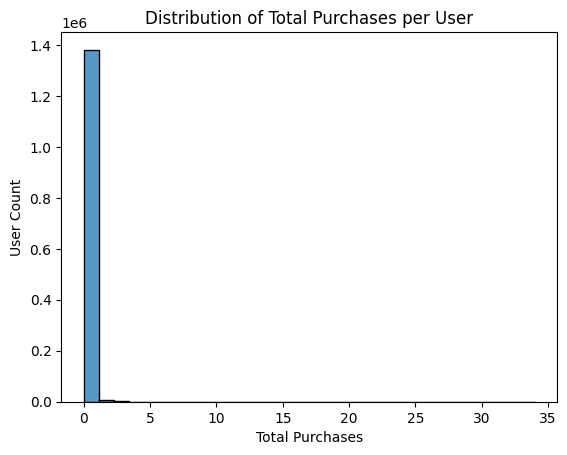

In [35]:
sns.histplot(user_df['total_purchases'], bins=30)
plt.title("Distribution of Total Purchases per User")
plt.xlabel("Total Purchases")
plt.ylabel("User Count")
plt.show()

# `STEP 3: Clustering`

### **`Clustering Setup`**

**Imports**

In [72]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib import cm

**Setup Part**

For clustering I would need only numeric features, so I create new features list expicitly for clustering, dropping user_id, because it's just an identifier, also  first_action and last_action, because timestamps cannot be directly interpreted by a distance algorithm.

In [37]:
features_to_cluster = user_df[[
    'total_views', 'total_cart_additions', 'total_purchases',
    'num_events', 'activity_days', 'most_active_hour', 'event_frequency', 'weekend_activity_ratio',
    'cart_to_view_ratio', 'cart_to_purchase_ratio', 'purchase_to_view_ratio', 'purchase_to_cart_ratio',
    'avg_price_viewed', 'avg_price_carted', 'total_spent', 'price_diff_cart_vs_view',
    'num_categories', 'num_products_viewed',
    'recency_days', 'session_duration_minutes', 'days_since_last_action',
    'purchase_ratio'
]]

Also because KMeans are numeric value, we need to standardize the features.

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_to_cluster)

To choose number of clusters, I will try several methods for easier understanding of the best.


In [39]:
K_range = range(2, 9)
inertia = []
db_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    inertia.append(kmeans.inertia_)
    db = davies_bouldin_score(X_scaled, labels)
    db_scores.append(db)

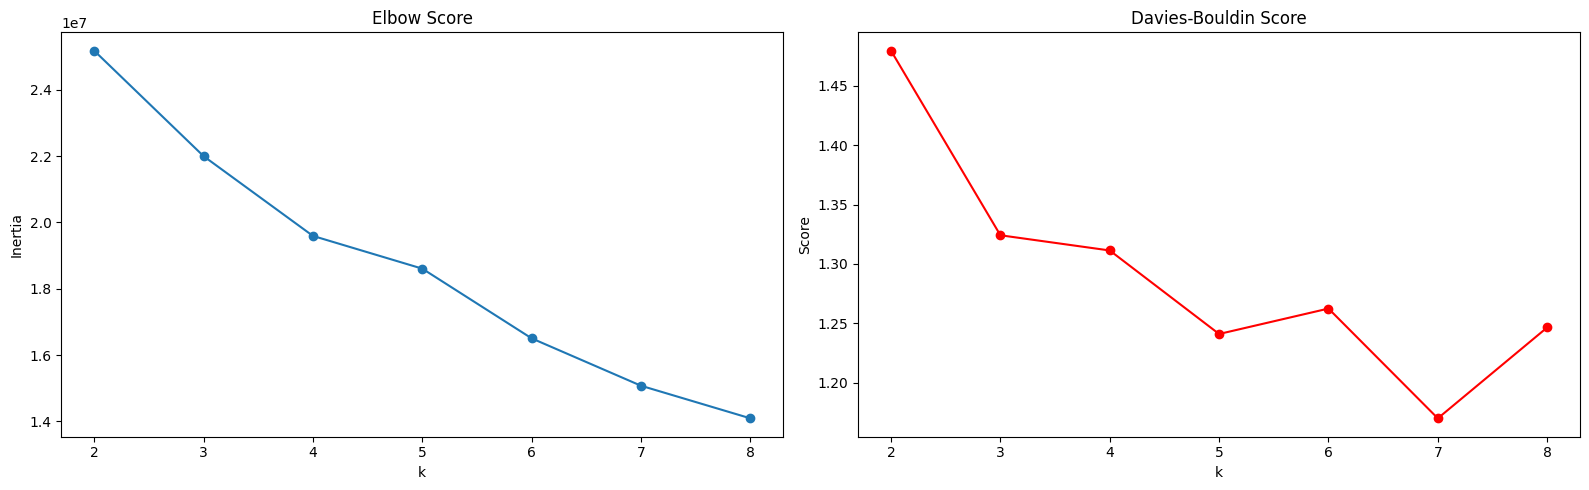

In [40]:
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Score")
plt.xlabel("k")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(K_range, db_scores, marker='o', color='red')
plt.title("Davies-Bouldin Score")
plt.xlabel("k")
plt.ylabel("Score")

plt.tight_layout()
plt.show()


We can see the big inertia drop between 2 and 4, so the best number of clusters to choose would be 4.
But if we also want to see the specific small clusters, we can try 5 as well. I will do both and see what works better for us.

From the Davies-Bouldin score we can see that k=5 and k=7 works the best in this situation.

From that I have decided to try out 2 more stable options k=4 and k=5


In [41]:
kmeans4 = KMeans(n_clusters=4, random_state=42, n_init=10)
user_df['cluster_4'] = kmeans4.fit_predict(X_scaled)

In [42]:
kmeans5 = KMeans(n_clusters=5, random_state=42, n_init=10)
user_df['cluster_5'] = kmeans5.fit_predict(X_scaled)

In [43]:
print(user_df['cluster_4'].value_counts())
print(user_df['cluster_5'].value_counts())

cluster_4
0    1067694
2     220293
1      57334
3      44218
Name: count, dtype: int64
cluster_5
2    1065355
0     217538
4      48540
1      43145
3      14961
Name: count, dtype: int64


We can see, that 4 clusters can already give us the strong result, 0 cluster give us dominant users. That means cluster 0 is by far the largest, probably representing inactive or minimally engaged users. While 5th cluster just splits off a small group of users. That why we will stick with 4 clusters for now to keep analysis clean and coherent.


/tmp/ipython-input-77-2428884310.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', best_k)
/tmp/ipython-input-77-2428884310.py:38: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


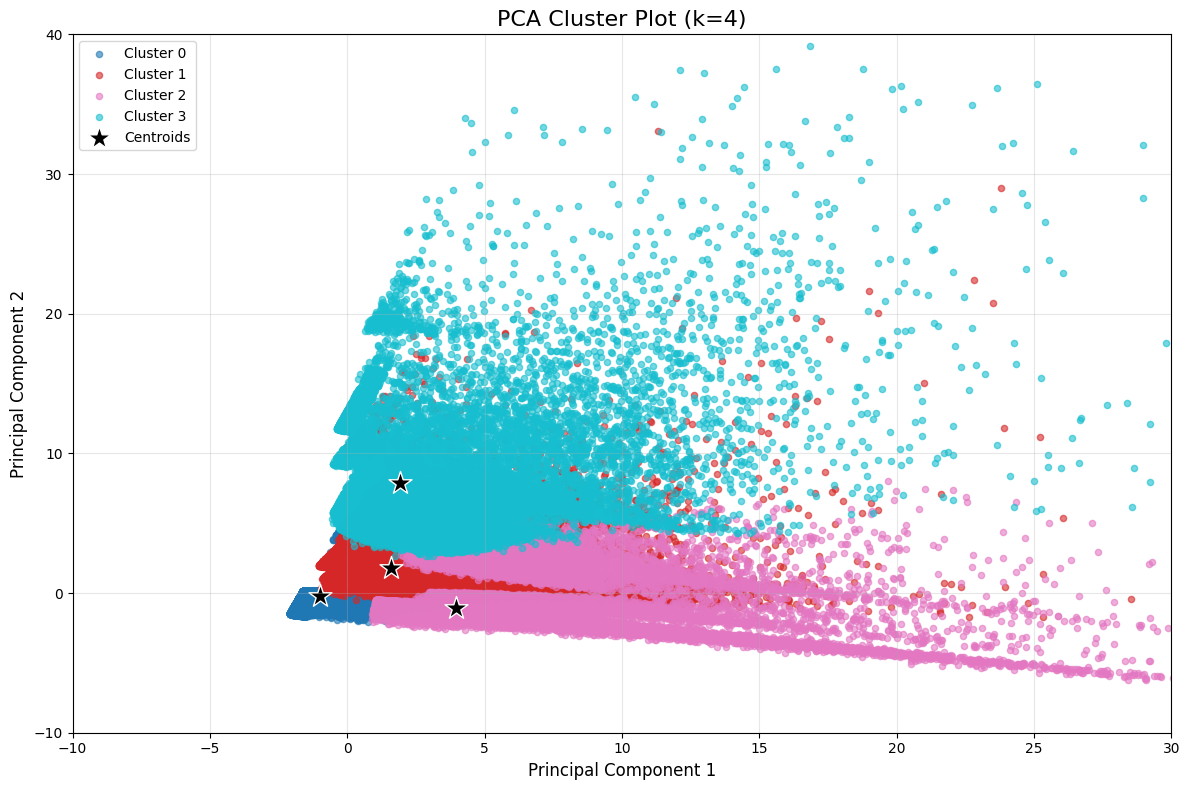

In [77]:
best_k = 4

plt.figure(figsize=(12, 8))
colors = cm.get_cmap('tab10', best_k)

for cluster_id in range(best_k):
    plt.scatter(
        X_pca[labels == cluster_id, 0],
        X_pca[labels == cluster_id, 1],
        s=20,
        color=colors(cluster_id),
        alpha=0.6,
        label=f"Cluster {cluster_id}"
    )

# centroids
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    s=300,
    c='black',
    marker='*',
    edgecolor='white',
    linewidth=1,
    label='Centroids'
)

plt.title(f"PCA Cluster Plot (k={best_k})", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()

# zoom in (adjust as needed)
plt.xlim(-10, 30)
plt.ylim(-10, 40)

plt.tight_layout()
plt.show()



The PCA projection shows that most user behavior is fairly concentrated, with the four clusters overlapping somewhat, but still distinguishable in different regions of PC1 and PC2.

**Cluster 0** tends to concentrate around (0,0), indicating generally low feature activity (likely window shoppers).

**Cluster 1 and Cluster 2** spread more along PC1, suggesting higher variation in purchase or cart behaviors.

**Cluster 3** shows more separation from the origin on PC2, indicating higher purchasing and consistent engagement patterns.

**The centroids** are close together but show slight separation, reflecting the challenge of perfectly separating user behavior, but still confirming the presence  group structures.

**Outliers** are likely from rare users with extremely high or low values (very high purchases or views), but overall the PCA supports the earlier cluster validation metrics.

### **Cluster Profiling (Answer 1 + 1.1)**

Now, we need to po profiling and understang who is in which group

In [51]:
cluster_profiles = user_df.groupby('cluster_4').mean()
print(cluster_profiles)

                user_id  total_views  total_cart_additions  total_purchases  \
cluster_4                                                                     
0          5.387360e+08     1.853882              0.001859         0.001833   
1          5.364170e+08     3.275247              1.280043         0.082185   
2          5.292491e+08     8.071786              0.048154         0.051377   
3          5.370029e+08     2.998688              0.138179         1.273169   

           num_events  activity_days  most_active_hour  event_frequency  \
cluster_4                                                                 
0            1.857574       1.706509         10.688294         1.445819   
1            4.637475       6.136394          9.942704         1.579054   
2            8.171317      17.969749         10.202875         0.540970   
3            4.410037       6.134787          9.694808         1.478930   

           weekend_activity_ratio  cart_to_view_ratio  ...  \
cluster_4   

In [52]:
print(cluster_profiles[['total_views', 'total_cart_additions', 'total_purchases',
                        'event_frequency', 'session_duration_minutes_y', 'purchase_ratio']])

           total_views  total_cart_additions  total_purchases  \
cluster_4                                                       
0             1.853882              0.001859         0.001833   
1             3.275247              1.280043         0.082185   
2             8.071786              0.048154         0.051377   
3             2.998688              0.138179         1.273169   

           event_frequency  session_duration_minutes_y  purchase_ratio  
cluster_4                                                               
0                 1.445819                   14.117414        0.000452  
1                 1.579054                   40.670972        0.012676  
2                 0.540970                   39.743944        0.005070  
3                 1.478930                   37.985905        0.493639  


**Cluster Profiles**

**Cluster 0 (Window Shoppers / Inactive Users)**

Total views 1.8, basically zero purchases, very low activity, purchase ratio ~0.0004. Interests are very narrow (1–2 categories).
Session duration ~14 minutes on average.

**Description:** They barely view, never cart or purchase, and leave quickly. Likely window shoppers or inactive.


**Cluster 1 (Cart Abandoners)**

Total views 3.3, some cart additions (1.3), but very few purchases (0.08 on average), purchase ratio 0.0126. Engagement moderate, a bit wider interest.
Session duration ~41 minutes on average.

**Description:** They engage, add to cart, but rarely check out - typical cart abandoners.


**Cluster 2 (Browsers)**

Total views ~8, high viewing but very low purchases (0.05), almost no cart activity. Purchase ratio ~0.005. Interest is moderately diverse.
Session duration ~40 minutes on average.

**Description:** They explore a lot over time, visiting repeatedly, but buy almost nothing, exploratory browsers.

**Cluster 3 (Frequent buyers)**

Total views ~3, some cart additions (0.14), and relatively high purchases (1.27), purchase ratio ~0.49 (very high). Interests fairly focused.
Session duration ~38 minutes on average.

**Description:** These are loyal or frequent buyers — they convert well, buy often, and have stable session times.

**Visualization of profiles**

Then, I have decided to vizualize our clusters, to see which cluster is highest on purchasing, which has longest sessions and which is basically inactive. For that I need to first scale them, so all the values 0 or 1.

In [54]:
features_to_plot = ['total_views', 'total_cart_additions', 'total_purchases',
                    'purchase_ratio', 'session_duration_minutes_y', 'event_frequency']

scaler = MinMaxScaler()
scaled = scaler.fit_transform(cluster_profiles[features_to_plot])

scaled_profiles = pd.DataFrame(
    scaled,
    columns=features_to_plot,
    index=cluster_profiles.index
)


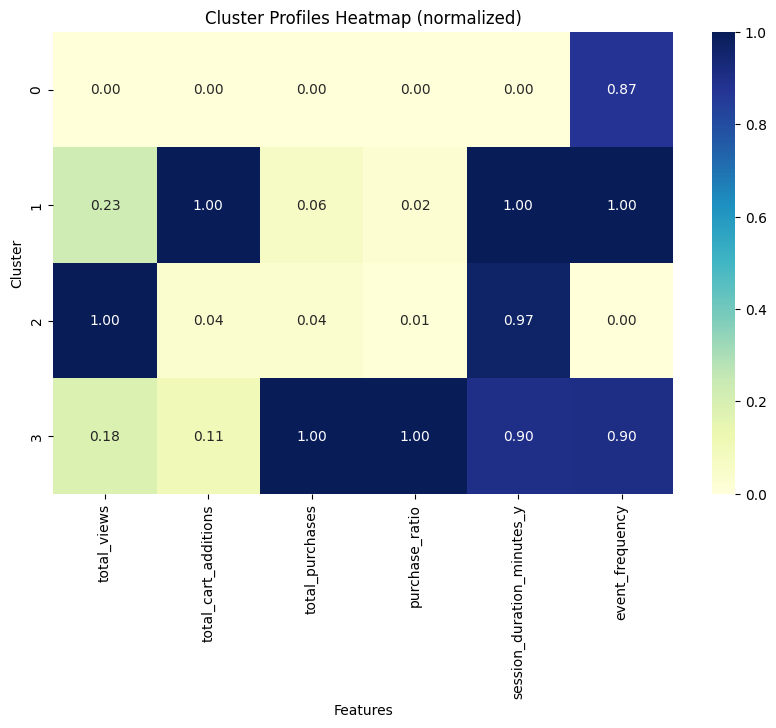

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(scaled_profiles, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Cluster Profiles Heatmap (normalized)")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()

The heatmap illustrates distinct shopping behavior patterns across four user clusters. **Cluster 0** represents window shoppers or inactive users, with very low views, negligible cart or purchase activity, and a minimal purchase ratio. Their event frequency is moderately high, suggesting they briefly browse but do not engage meaningfully.

**Cluster 1** can be identified as cart abandoners. They show moderate viewing activity and the highest cart additions among all clusters, but very low purchases and a low purchase ratio overall. Their session durations are relatively long, reflecting engaged exploration without completing transactions.

**Cluster 2** includes exploratory browsers with the highest number of views, moderately diverse interests, and long session durations, but extremely low purchases and low event frequency. This indicates they repeatedly explore the platform over longer periods without converting.

**Cluster 3** is shown as frequent or loyal buyers, characterized by strong purchasing behavior and the highest purchase ratio. They demonstrate moderate viewing and carting, but convert reliably, with balanced session durations and consistent event frequencies.

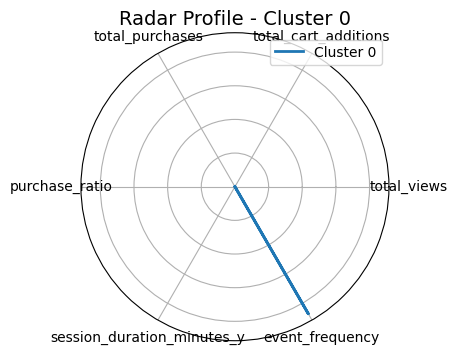

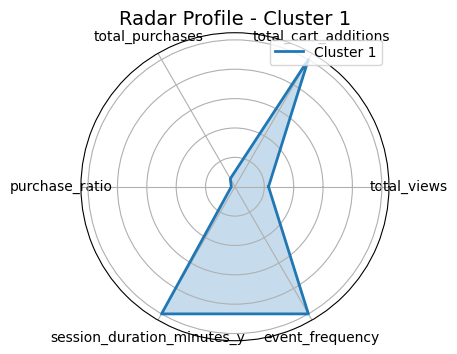

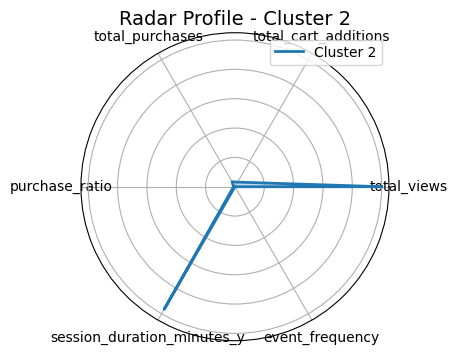

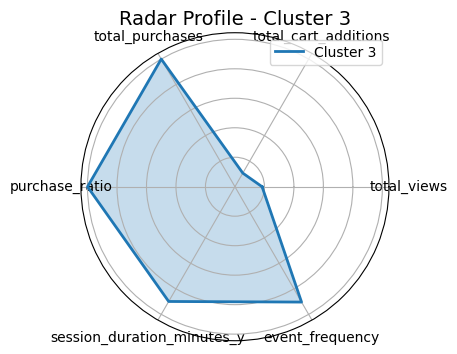

In [59]:
features_to_plot = ['total_views', 'total_cart_additions', 'total_purchases',
                    'purchase_ratio', 'session_duration_minutes_y', 'event_frequency']

# angles for radar
num_vars = len(features_to_plot)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the circle

# plot for each cluster
for cluster_id in scaled_profiles.index:
    values = scaled_profiles.loc[cluster_id, features_to_plot].tolist()
    values += values[:1]  # close circle

    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))

    ax.plot(angles, values, linewidth=2, label=f"Cluster {cluster_id}")
    ax.fill(angles, values, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features_to_plot, fontsize=10)
    ax.set_yticklabels([])
    ax.set_title(f"Radar Profile - Cluster {cluster_id}", size=14)
    plt.legend(loc='upper right')
    plt.show()


**Radar Plot Insights**

**Cluster 0 (Window Shoppers):** Barely any views, carts, or purchases; moderate event frequency, minimal engagement.

**Cluster 1 (Cart Abandoners):** Moderate views, highest cart activity, but rarely purchase; long sessions suggest they stall at checkout.

**Cluster 2 (Browsers):** Extremely high views and long sessions, but very low carts and purchases; explore a lot without buying.

**Cluster 3 (Frequent Buyers):** Balanced views and carts, highest purchases and purchase ratio, with steady sessions; loyal and engaged.

These radar profiles confirm and strengthen the findings from the heatmap,  validating the four clear shopper personas identified through the clustering.

### **Category & Price Analysis (Answer 1.2)**




I have started with identifiyng users most common product category, so what user  most frequently interacted with, whether by: viewing adding to cart or purchasing.

In [67]:
# get each user’s most frequent category (but we have unknown, so idk what to do and if it is right to leave it, or should i try to fill with second most common)
user_top_category = (
    df_sampled.groupby(['user_id', 'category_code'])
    .size()
    .reset_index(name='counts')
    .sort_values(['user_id', 'counts'], ascending=[True, False])
    .drop_duplicates('user_id')
    .rename(columns={'category_code': 'most_common_category'})
    [['user_id', 'most_common_category']]
)

# merge with user_df
user_df = user_df.merge(user_top_category, on='user_id', how='left')


MergeError: Passing 'suffixes' which cause duplicate columns {'most_common_category_x'} is not allowed.

In [68]:
user_df.head()

,user_id,total_views,total_cart_additions,total_purchases,num_events,activity_days,most_active_hour,event_frequency,weekend_activity_ratio,cart_to_view_ratio,...,purchase_ratio,cluster_4,cluster_5,avg_session_duration_x,avg_session_duration_y,last_action_naive,session_duration_minutes_y,most_common_category_x,most_common_category_y,most_common_category
0,33869381,1,0,0,1,1,20,1.0,0.0,0.0,...,0.0,0,2,0.000000,0.000000,2019-10-23 20:04:08,0.000000,kids.carriage,kids.carriage,kids.carriage
1,184265397,1,0,0,1,1,17,1.0,0.0,0.0,...,0.0,0,2,0.000000,0.000000,2019-10-04 17:44:37,0.000000,furniture.living_room.chair,furniture.living_room.chair,furniture.living_room.chair
2,200673532,1,0,0,1,1,14,1.0,1.0,0.0,...,0.0,0,2,0.000000,0.000000,2019-10-13 14:26:21,0.000000,computers.components.motherboard,computers.components.motherboard,computers.components.motherboard
3,208669541,1,0,0,1,1,5,1.0,0.0,0.0,...,0.0,0,2,0.000000,0.000000,2019-10-04 05:49:46,0.000000,unknown,NaN,NaN
4,209714031,3,0,0,3,6,19,0.5,0.0,0.0,...,0.0,0,2,5.141667,5.141667,2019-10-29 19:49:54,5.141667,unknown,appliances.personal.hair_cutter,appliances.personal.hair_cutter


Then I look at categories that dominate for the cluster

In [69]:
category_counts_by_cluster = (
    user_df.groupby(['cluster_4', 'most_common_category'])
    .size()
    .reset_index(name='counts')
    .sort_values(['cluster_4', 'counts'], ascending=[True, False])
)

In [70]:
for cluster_id in category_counts_by_cluster['cluster_4'].unique():
    print(f"\nCluster {cluster_id} Top Categories:")
    print(category_counts_by_cluster[category_counts_by_cluster['cluster_4'] == cluster_id].head(5))


Cluster 0 Top Categories:
     cluster_4         most_common_category  counts
97           0       electronics.smartphone  325025
96           0           electronics.clocks   33849
90           0  electronics.audio.headphone   32304
101          0         electronics.video.tv   27213
70           0           computers.notebook   25680

Cluster 1 Top Categories:
     cluster_4         most_common_category  counts
211          1       electronics.smartphone   34131
204          1  electronics.audio.headphone    3126
215          1         electronics.video.tv    2250
166          1    appliances.kitchen.washer    1566
210          1           electronics.clocks    1531

Cluster 2 Top Categories:
     cluster_4         most_common_category  counts
335          2       electronics.smartphone   65231
334          2           electronics.clocks    9666
249          2                apparel.shoes    8235
328          2  electronics.audio.headphone    7792
308          2           computers.

**Category & Price Analysis (Answer to 1.2)**

**Cluster 0 (Window Shoppers):**
Most commonly interested in electronics.smartphone (by a huge margin), followed by clocks, headphones, and TVs. These users primarily view popular consumer electronics but do not convert.

**Cluster 1 (Cart Abandoners):**
Electronics dominate again, with smartphones and audio.headphones leading, plus appliances like kitchen washers appearing. They put tech products into carts but rarely buy.

**Cluster 2 (Browsers):**
Smartphones again most common, with clocks, shoes, and notebooks next. They explore broadly across categories but with little follow-through on purchasing.

**Cluster 3 (Frequent Buyers):**
Also focused on electronics.smartphone and headphones, with some purchases in appliances and TVs. These loyal buyers consistently engage with higher-value consumer electronics.


### **`Temporal Patterns (Answer 1.3)`**



### **Session Behavior (Answer 1.4)**


### **CONCLUSION**

# STEP 4: Regression modeling

# STEP 5: Classification

In [ ]:
pip install imbalanced-learn

In [ ]:
df_sampled['is_purchase'] = (df_sampled['event_type'] == 'purchase').astype(int)
df_sampled['is_cart'] = (df_sampled['event_type'] == 'cart').astype(int)
df_sampled['is_view'] = (df_sampled['event_type'] == 'view').astype(int)

In [ ]:
df_sampled['is_weekend'] = df_sampled['event_time'].dt.weekday >= 5

In [ ]:
activity_days_df_sampled = df_sampled.groupby('user_id')['event_time'].nunique().reset_index(name="activity_days")

In [ ]:
weekend_ratio_df = df_sampled.groupby('user_id')['is_weekend'].mean().reset_index(name="weekend_activity_ratio")

In [ ]:
user_df['activity_segment'] = pd.cut(user_df['num_events'],
                                     bins=[0,5,15,50,1000],
                                     labels=['low','medium','high','very_high'])

segment_agg = user_df.groupby('activity_segment').agg(
    avg_views=('total_views', 'mean'),
    avg_carts=('total_cart_additions', 'mean'),
    avg_purchases=('total_purchases', 'mean'),
    avg_total_spent=('total_spent', 'mean'),
    avg_purchase_ratio=('purchase_ratio', 'mean'),
    user_count=('user_id', 'count')
).reset_index()

In [ ]:
segment_agg.head()

In [ ]:
# Features sorted for readability
features = [
    # Activity
    'total_views', 'total_cart_additions',
    'num_events', 'activity_days', 'most_active_hour', 'event_frequency', 'weekend_activity_ratio',

    # Behavior
    'cart_to_view_ratio', 'cart_to_purchase_ratio',

    # Monetary (optional)
    'avg_price_viewed', 'avg_price_carted', 'price_diff_cart_vs_view',

    # Diversity
    'num_categories', 'num_products_viewed',

    # Timestamps
    'recency_days', 'session_duration_minutes', 'days_since_last_action'
]
# Define target
# If you haven't yet, you can define purchase_next7 as
# e.g. any user with at least 1 purchase = 1
user_df['purchase_next7'] = (user_df['total_purchases'] > 0).astype(int)

# Features (X) and target (y)
X = user_df[features]
y = user_df['purchase_next7']

**Modelling and changing the data to test and train**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
#handling imbalances

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train_res, y_train_res)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.barh(features, clf.feature_importances_)
plt.title("Feature Importances")
plt.show()